### Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
len(df)

5572

In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

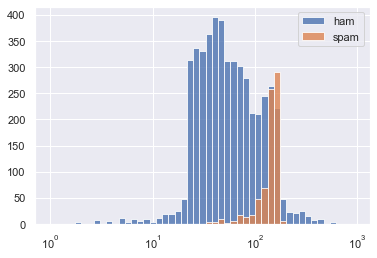

In [8]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()
# spam text messages happen to be longer than ham ones.

In [9]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

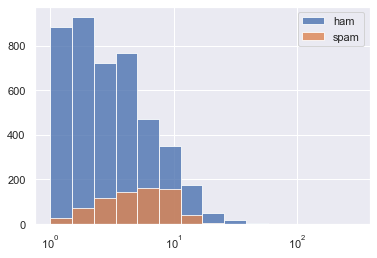

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
X = df[['length','punct']]
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3900, 2)
Testing Data Shape:  (1672, 2)


In [13]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [14]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
2505,160,10
2525,99,5
4975,62,5
650,97,11


In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
from sklearn import metrics

predictions = lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [17]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [18]:
print(metrics.classification_report(y_test,predictions))
# model is very good in detecting ham messages, but it is horrible in detecting spam text messages

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [19]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [21]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [23]:
print(metrics.accuracy_score(y_test,predictions))

0.8600478468899522


In [24]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

In [25]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [26]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [27]:
print(metrics.accuracy_score(y_test,predictions))

0.8827751196172249


https://en.wikipedia.org/wiki/Confusion_matrix

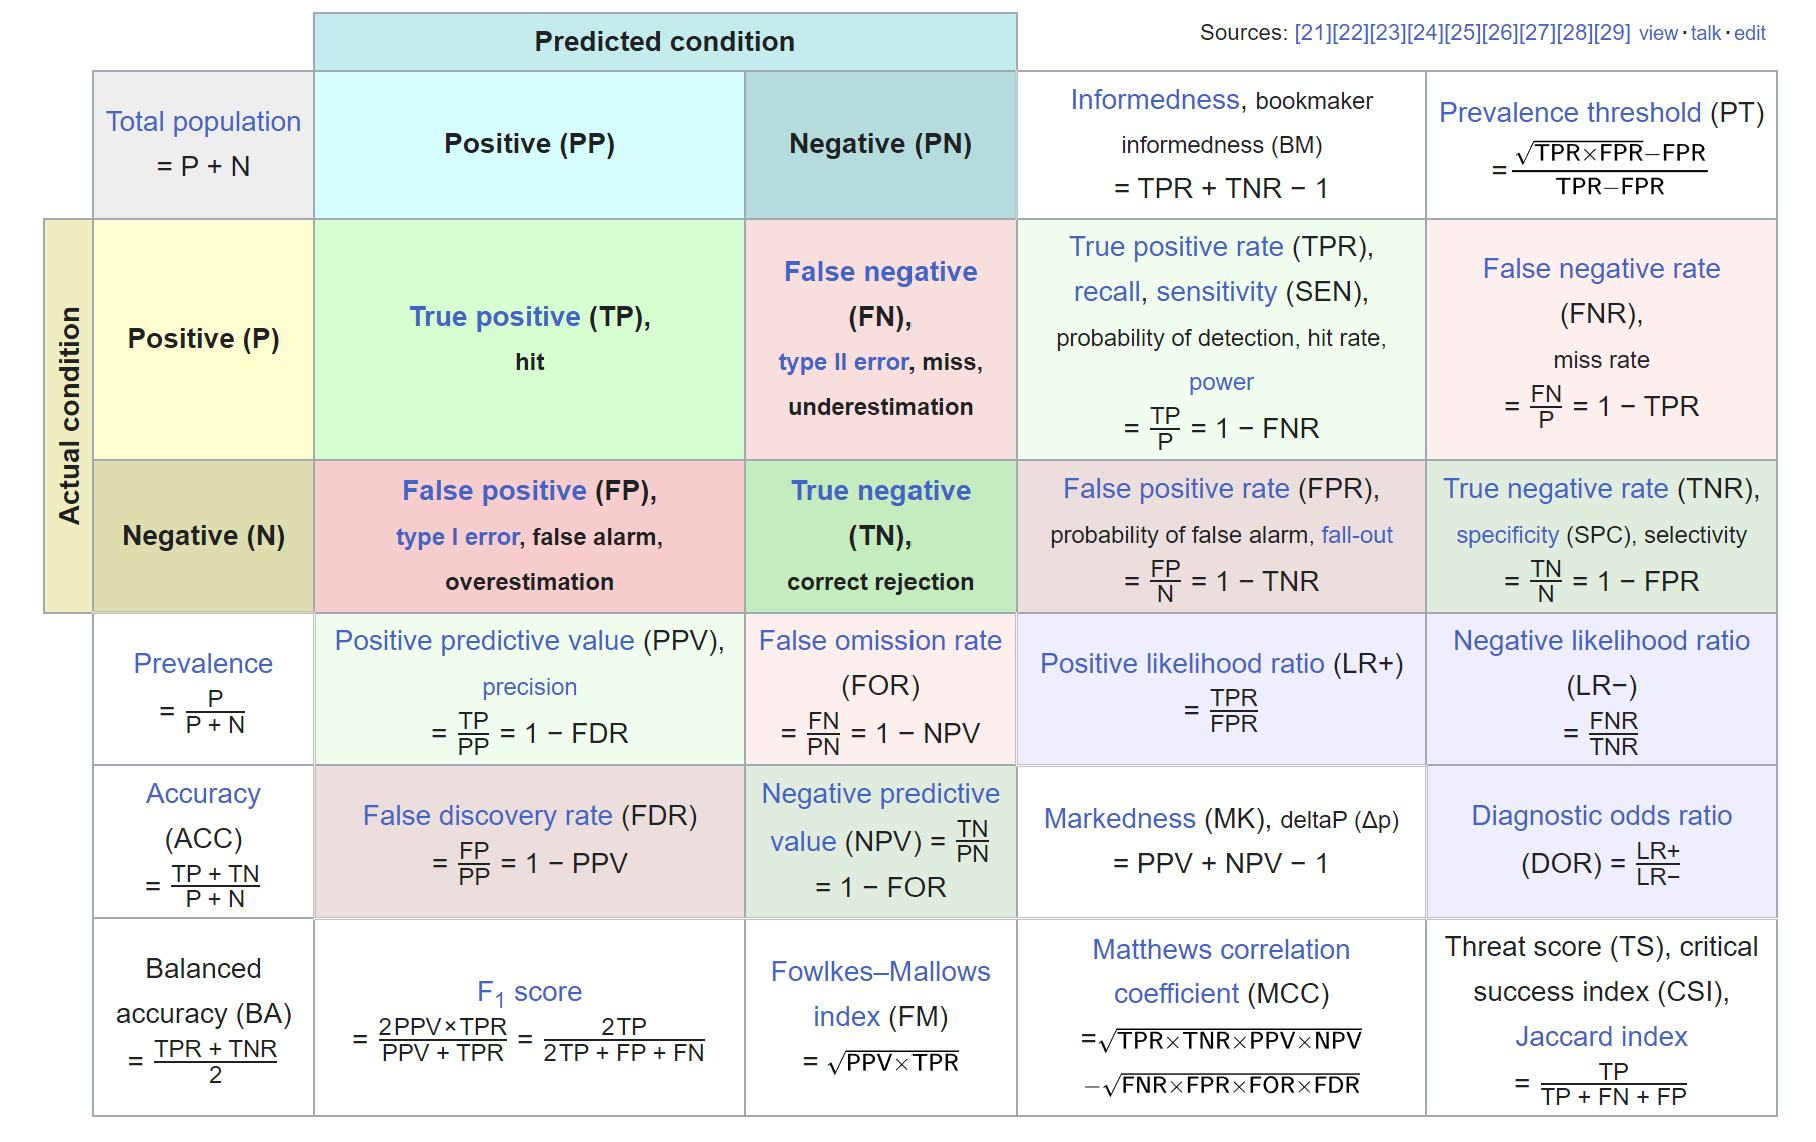

### Text Feature Extraction

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [32]:
X = df['message']

In [33]:
y = df['label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
count_vect = CountVectorizer()

In [37]:
# count_vect.fit(X_train) # build vocab, count the number of words
# X_train_counts = count_vect.transform(X_train) # transform the original text message to vector
X_train_counts = count_vect.fit_transform(X_train)

In [38]:
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
tfidf_transformer = TfidfTransformer()

In [41]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [42]:
X_train_tfidf.shape

(3733, 7082)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = TfidfVectorizer()

In [45]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [46]:
X_train_tfidf

<3733x7082 sparse matrix of type '<class 'numpy.float64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.svm import LinearSVC

In [48]:
clf = LinearSVC()

In [49]:
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [52]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
predictions = text_clf.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_test, predictions))

[[1586    7]
 [  12  234]]


In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test, predictions)

0.989668297988037

In [59]:
text_clf.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [60]:
text_clf.predict(["Congratulations! You've been selected as a winner. TEXT WON to 44255 congratulations freee entry to contest."])

array(['spam'], dtype=object)

In [65]:
clf = LinearSVC()
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
clf.fit(X_train_tfidf, y_train)
predictions = clf.predict(vectorizer.transform(X_test))
metrics.accuracy_score(y_test, predictions)

0.989668297988037

### Code Along Project

In [66]:
df = pd.read_csv("moviereviews.tsv", sep="\t")

In [67]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [68]:
len(df)

2000

In [69]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [72]:
len(df)

1965

In [73]:
blanks = []

for i, lb, rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [74]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [75]:
df.drop(blanks, inplace=True)

In [76]:
len(df)

1938

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df['review']

In [80]:
y = df['label']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [83]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [84]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [85]:
predictions = text_clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [87]:
print(confusion_matrix(y_test, predictions))

[[235  47]
 [ 41 259]]


In [88]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



In [89]:
print(accuracy_score(y_test, predictions))

0.8487972508591065
